# I. Introduction
The problem space I have chosen to explore involves analyzing data about student admissions to Penn State from 2019 to 2023. The dataset was obtained from the university's official data repository (https://datadigest.psu.edu/student-enrollment/) and contains 547 rows and the following columns:
```
Enrollment Count, Term FTE, Fall Term, Tuition Residency, Full/Part-Time Indicator, Degree Type, Gender, Race/Ethnicity
```
The reasoning behind focusing on 2019 to 2023 is to analyze the most up-to-date data concerning student admissions. Data pertaining to the past decades may not be completely representative of the current landscape, especially in the rapidly changing environment that is the college admission process. Adittionally, 

The stakeholders who stand to benefit from this analysis include university admins, advertisers, and governing officials. University administrators, specifically the *Penn State Planning, Assessment, and Institutional Research Department* can use the insights to make informed decisions about admissions policies and resource allocation, these insights can drive improvements in the admission process and student services. While advertisers can utilize these analytics to create advertisements and marketing campaigns targeted towards certain student demographics at Penn State. Finally, governing officials like the mayor or governor can use this data, in conjuction with other metrics, to make better policies, improve programs directed towards higher education, and in electorial campaigns.

# II. Data Preparation
Collecting the data involved downloading a csv file from the university's official data repository (https://datadigest.psu.edu/student-enrollment/), specifically the summary data, which includes general information about students who were admitted and attended university. Creating a dataframe for the data was straight forward, however there is a concern about the data that requires data cleaning to order to move on to the analysis process. The *Enrollment Count* column contains the number of students who match the description in the other rows, in other words, they contain the same value for all the rest of the columns. I assume that this decision was made in order to reduce the amount of rows, in turn reducing the amount of storage size necessary. However, this complicates the analysis process because each row no longer corresponds to a single student, but can represent many students. This is not intuitive and could lead to complications, so I dealt with this issue in the following manner:

Loop through the rows of the dataframe, let n be the enrollment count of that row, if n > 1, I will add n-1 copies of the row to the dataframe. Such that each row corresponds to a single student. As a result, the enrollment count column can be now ignored.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
enrollment_df = pd.read_csv('enrollment.csv')

enrollment_df

,Enrollment Count,Term FTE,Fall Term,Tuition Residency,Full/Part-Time Indicator,Degree Type,Gender,Race/Ethnicity
0,1388,1388.0,2019,In-State,Full Time,Bachelor's,Male,White
1,1122,1122.0,2020,In-State,Full Time,Bachelor's,Male,White
2,998,998.0,2021,In-State,Full Time,Bachelor's,Male,White
3,906,906.0,2023,In-State,Full Time,Bachelor's,Male,White
4,850,850.0,2019,In-State,Full Time,Associate,Male,White
...,...,...,...,...,...,...,...,...
542,1,0.3,2023,In-State,Part Time,Nondegree,Male,Race/Ethnicity Unknown
543,1,0.3,2021,In-State,Part Time,Nondegree,Female,Two or More Races
544,1,0.3,2022,In-State,Part Time,Nondegree,Male,Two or More Races
545,1,0.3,2022,Out-of-State,Part Time,Nondegree,Male,White


In [38]:
# The Enrollment Count column contains the number of students that fit the "description" of that row.
# The following code adds (Enrollment Count - 1) number of copies of that row to the dataframe,
# such that there are n rows of students that fit that description instead of 1.

enrollment_df = pd.read_csv('enrollment.csv')

for i, row in enrollment_df.iterrows():
    enrollment_count = row['Enrollment Count']
    if enrollment_count > 1:
        added_enrollments = pd.DataFrame([row.copy() for i in range(enrollment_count-1)])
        enrollment_df = pd.concat([enrollment_df, added_enrollments])
    enrollment_df.reset_index(drop=True, inplace=True)

enrollment_df

,Enrollment Count,Term FTE,Fall Term,Tuition Residency,Full/Part-Time Indicator,Degree Type,Gender,Race/Ethnicity
0,1388,1388.0,2019,In-State,Full Time,Bachelor's,Male,White
1,1122,1122.0,2020,In-State,Full Time,Bachelor's,Male,White
2,998,998.0,2021,In-State,Full Time,Bachelor's,Male,White
3,906,906.0,2023,In-State,Full Time,Bachelor's,Male,White
4,850,850.0,2019,In-State,Full Time,Associate,Male,White
...,...,...,...,...,...,...,...,...
22329,2,2.0,2023,Out-of-State,Full Time,Master's,Female,White
22330,2,2.0,2022,In-State,Full Time,Nondegree,Male,White
22331,2,0.8,2023,In-State,Part Time,Nondegree,Male,Asian
22332,2,0.5,2021,In-State,Part Time,Nondegree,Male,Race/Ethnicity Unknown


# III. Research Questions
Each question has been designed to reveal simple yet powerful insights from the dataset. Collectively, these 6 questions aim to construct a comprehensive report that highlight key aspects of the data.
1. What is the racial demographic of Penn State?
2. What is the gender demographic of Penn State?
3. How many students attend In-State vs Out-of-State? 
4. How many students attend full time vs part time?
5. What % of students are pursuing a Bachelor's?
6. How many students started each fall term? To elaborate, we are trying to find the number of students who started in each fall semester.

In [316]:
PLOT_COLORS = ['tab:brown', 'tab:orange']

In [180]:
# 1. What is the racial demographic of Penn State?

races = enrollment_df['Race/Ethnicity'].unique()
results = pd.DataFrame(columns=races)

for race in races:
    num_students = len(enrollment_df[enrollment_df['Race/Ethnicity'] == race])
    percentage = round(num_students / len(enrollment_df) * 100, 2)
    results[race] = [num_students]
    print(f'{percentage}% of students are {race}')

86.79% of students are White
4.56% of students are Hispanic/Latino
3.49% of students are Black/African American
2.61% of students are Two or More Races
1.46% of students are Asian
0.73% of students are Race/Ethnicity Unknown
0.19% of students are American Indian/Alaska Native
0.13% of students are Native Hawaiian/Pacific Islander
0.05% of students are International


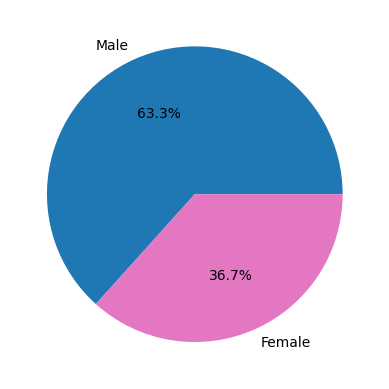

In [259]:
# 2. What is the gender demographic of Penn State?

genders = enrollment_df['Gender'].unique()
results = []

for gender in genders:
    num_students = len(enrollment_df[enrollment_df['Gender'] == gender])
    results.append(num_students)

plt.pie(results, labels=genders, autopct='%.1f%%', colors=['tab:blue', 'tab:pink'])
pass

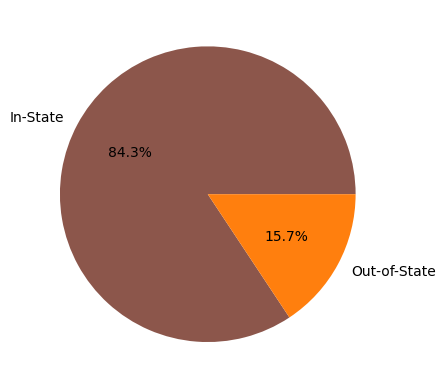

In [317]:
# 3. What % of students attend In-State vs Out-of-State?
residencies = enrollment_df['Tuition Residency'].unique()
results = []
for residency in residencies:
    num_students = len(enrollment_df[enrollment_df['Tuition Residency'] == residency])
    results.append(num_students)

plt.pie(results, labels=residencies, autopct='%.1f%%', colors=PLOT_COLORS)
pass

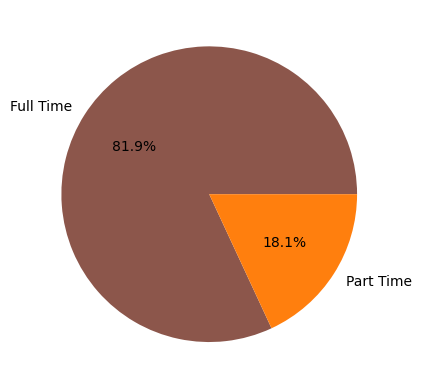

In [318]:
# 4. What % of students attend full time vs part time?
statuses = enrollment_df['Full/Part-Time Indicator'].unique()
results = []
for status in statuses:
    num_students = len(enrollment_df[enrollment_df['Full/Part-Time Indicator'] == status])
    results.append(num_students)

plt.pie(results, labels=statuses, autopct='%.1f%%', colors=PLOT_COLORS)
pass

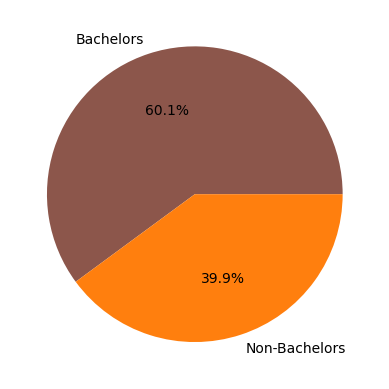

In [319]:
# 5. What % of students are pursuing a Bachelor's?
num_students = len(enrollment_df[enrollment_df['Degree Type'] == "Bachelor's"])
plt.pie([num_students, len(enrollment_df) - num_students], labels=['Bachelors', 'Non-Bachelors'], autopct='%.1f%%', colors=PLOT_COLORS)
pass

22.3% of students started during the Fall of 2019
20.44% of students started during the Fall of 2020
18.98% of students started during the Fall of 2021
18.99% of students started during the Fall of 2022
19.28% of students started during the Fall of 2023


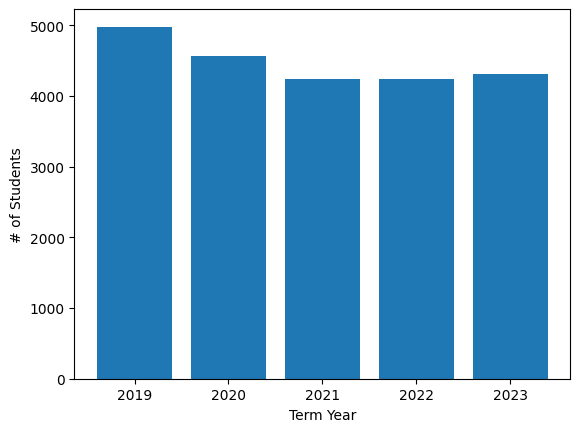

In [323]:
# 6. How many students started each fall term?

terms = enrollment_df['Fall Term'].unique()
terms.sort()
result = []
for term in terms:
    num_students = len(enrollment_df[enrollment_df['Fall Term'] == term])
    result.append(num_students)
    print(f'{round(num_students / len(enrollment_df) * 100, 2)}% of students started during the Fall of {term}')

plt.xlabel('Term Year')
plt.ylabel('# of Students')
plt.bar(terms, result)
pass

In [321]:
# 7. What is the average penn state student?

info = pd.read_csv('enrollment.csv').sort_values('Enrollment Count', ascending=False).iloc[:4]

summary = lambda l: ' or '.join(l.unique().tolist())

print(f"""Most Penn State students attend {summary(info['Tuition Residency'])}
and are {summary(info['Race/Ethnicity'])} and {summary(info['Gender'])}
and are pursuing a {summary(info['Degree Type'])}.
This description fits {round(info['Enrollment Count'].sum() / len(enrollment_df) * 100, 2)}% of Penn State students.
""")

Most Penn State students attend In-State
and are White and Male
and are pursuing a Bachelor's.
This description fits 19.76% of Penn State students.



# IV. Insights
For question 1, we aimed to answer the question: What is the racial demographic of Penn State? The results are:
* 86.79% of students are White
* 4.56% of students are Hispanic/Latino
* 3.49% of students are Black/African American
* 2.61% of students are Two or More Races
* 1.46% of students are Asian
* 0.73% of students are Race/Ethnicity Unknown
* 0.19% of students are American Indian/Alaska Native
* 0.13% of students are Native Hawaiian/Pacific Islander
* 0.05% of students are International

It's clear that the large majority of students fall under the racial category of White. In fact, only 13.22% of students who attend Penn State do not fall under this category. This is not unordinary, as most colleges in the United States are a predominately white institution (PWI). Perhaps at the government level, this highlights that social/academic programs that focus on assisting minorities to enter higher educations could benefit from more funding.

For question 2, we aimed to answer the question: What is the gender demographic of Penn State?
* 63.3% of students are Male
* 36.7% of students are Female

Suprisingly, there is quite a difference in the number of Male and Female students. I believe this can be attributed to the popularity of engineering and computer science major here at Penn State, which tend to be more male dominant. This shows that Penn State may need to put more focus on academic developing programs for majors that tend to be more female dominant, like nursing.

For question 3, we aimed to answer the question: What % of students attend In-State vs Out-of-State?
* 84.3% of students are In-State
* 15.7% of students are Out-of-State

I believe this is attributed to the large difference in tuition costs for Out-Of-State students. Therfore, Penn State could possibly benefit from lowering the cost of tuition for Out-of-State students, which would lead to an increase in out-of-state students.

For question 5, we aimed to answer the question: What % of students are pursuing a Bachelor's?
* 60.1% of students are pursuing a Bachelor's
* 39.9% of students are not pursuing a Bachelor's

While it is true that a majority of students are pursuing a Bachelor's, 40% is still a large portion of students. Governments could focus on creating jobs whose role can be fullfilled by those with associate degrees, which could drive an increased demand for obtaining an associates degrees.

for question 6, we aimed to answer the question: How many students started each fall term?
* 22.3% of students started during the Fall of 2019
* 20.44% of students started during the Fall of 2020
* 18.98% of students started during the Fall of 2021
* 18.99% of students started during the Fall of 2022
* 19.28% of students started during the Fall of 2023

Unfortunately, these results do not yield a whole lot of insight for us, since there is has been little change between the years.